Mingxin Liu

mxl592

As for question four. ROC curve is implemented to illustrates the diagnostic ability of the binary classifier. The representation of the ROC curve is by plotting the TPR and FPR at various thresholds to show the sensitivity of the classifier. There are four possible outcomes of the classifier. TP, FP, TN and FN. When both the prediction and true results are true, then the outcome is TP. So on and so forth. 

(600, 658)


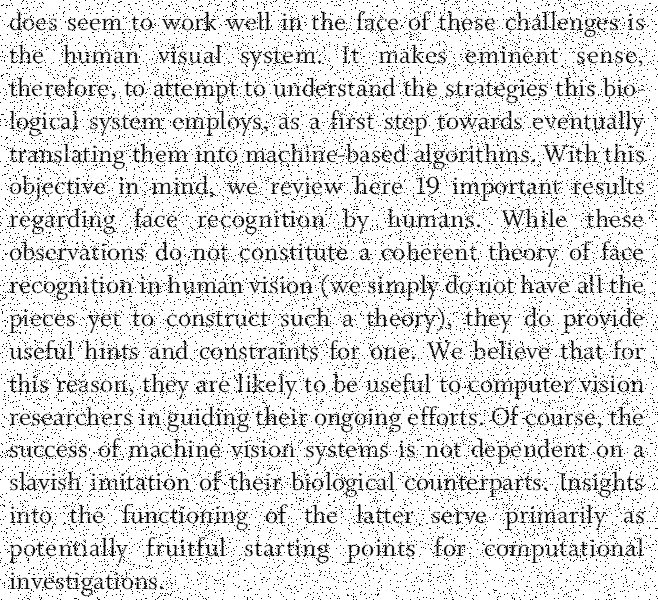

In [3]:
from sklearn.metrics import roc_curve
import numpy as np
import PIL
from PIL import Image
import scipy.io as io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp



im = cv2.imread('../data/characters.png')
Img= Image.open('../data/characters.png','r')
img = Img.convert('L')
img_matrix = np.array(img)
#img_matrix = img.astype(np.uint8)
mat_matrix = sc.loadmat('../data/template-h.mat')
mat_matrix = mat_matrix['T']
#print(img_matrix[0])
print(mat_matrix[0])

kernel = np.ones((5,5),np.float32)/25
#print(kernel)
dst = cv2.filter2D(im,-1,kernel)
edges = cv2.Canny(dst, 100, 200)

plt.subplot(121),plt.imshow(dst),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges),plt.title('with edge detection')
plt.xticks([]), plt.yticks([])
plt.show()
plt.show
print(img_matrix.shape)
thresh = 15




#Here is the function where I'm adding salt like noises onto the original image.
def sp_noise(image,prob):
    
    shape = np.shape(image)
    output = np.zeros(shape,np.uint8)
    thres = 1 - prob 
    for i in range(shape[0]):
        for j in range(shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
    
    
noise_img = sp_noise(image,0.05)   
noise_img
result = Image.fromarray(noise_img)
result



Here is the result of the original image after adding salt like noise. The purpose of this is to test the code with more difficulties to find a better comparison for the ROC curve plotting. 

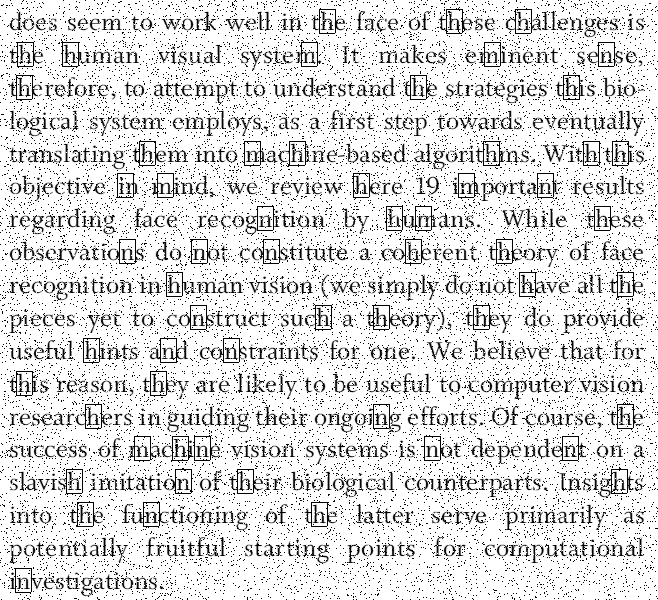

In [5]:
col = img_matrix.shape[0] - mat_matrix.shape[0]
row = img_matrix.shape[1] - mat_matrix.shape[1]
#here minus the kernel from the original image and set to the correlation matrix
Corr_matrix = np.zeros((col, row))
threshold = 30
for i in range(col):
    for j in range(row):
        Corr_matrix[i][j] = np.sum((img_matrix [i:i+mat_matrix.shape[0], j:j+mat_matrix.shape[1]] /255- mat_matrix)** 2)
        #here is to apply the auto-correlation function of i and j from 1 to col and row. Basically comparing letter 
        #h kernel with patch taken from the original matrix. Dividing by 255 is becuase the pixel value in the original
        #image was 255, and the kernel has values of 1s and 0s. 
for i in range(col):
    for j in range(row):
        if Corr_matrix[i, j] < threshold:
      
                img_matrix[i:i + mat_matrix.shape[0], j + mat_matrix.shape[1]] = 0
                img_matrix[i + mat_matrix.shape[0], j:j + mat_matrix.shape[1]] = 0
              
                img_matrix[i:i + mat_matrix.shape[0], j] = 0
                img_matrix[i:i + mat_matrix.shape[0], j + mat_matrix.shape[1]] = 0
                img_matrix[i, j:j + mat_matrix.shape[1]] = 0
result = Image.fromarray(noise_img)
result           

We can see that, clearly with the same threshold we are experiencing less accurate results. The detector picked up a couple ns and ms. Then we are ought to calculate the PPV and NPV for our ROC plot. 

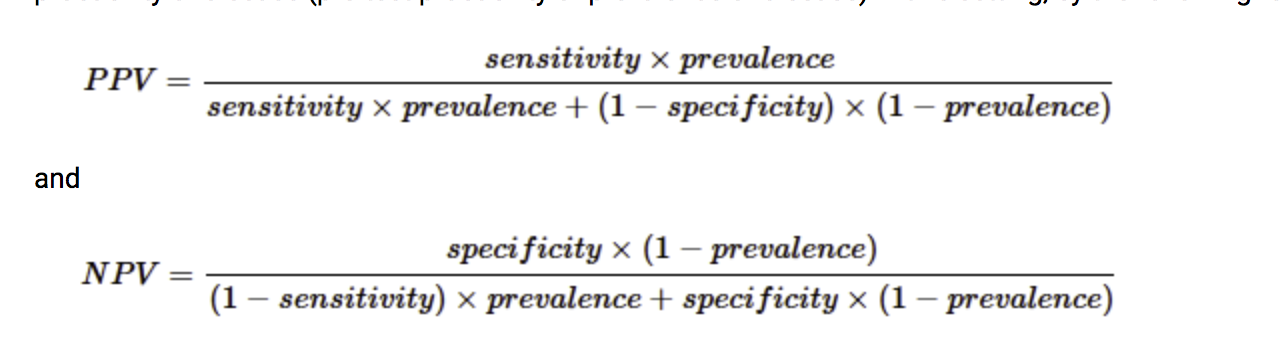

In [6]:
equ = Image.open('equ.png')
equ

Here is the euqation we ought to calculate PPV and NPV from in order to plot the graph. The noise input can show a comparison on from the ROC plot. Where the noise ratio is 3:1. We can see the true probablity gets much higher once the threshold increases. Here I'll compute the plot for both results and compare their PPV and NPV with respect to the sensitivity and prevalence. 

In [25]:
#the code to generate sample data and target.
X = Result1, Result2
y = image

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

# Compute ROC curve and ROC area for each class
PPV = dict()
FFP = dict()
roc_auc = dict()
for i in range(n_classes):
    PPV[i], FFP[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(PPV[i], FFP[i])

# Compute micro-average ROC curve and ROC area
PPV["micro"], FFP["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()

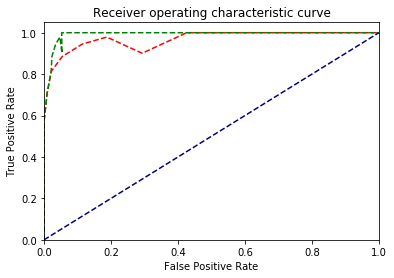

In [21]:
plt.plot(FPP,NPV,'r--' , FPP2,NPV,'g--')
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()


Here from the plot we can conclude that the noise added data has a bigger false positive rate, or random chance. However this issue could be resolved by incresing the threshold. But at the instance of the same threshold, a smoother image has a bigger chance to reduce the equal error rate. For further analysis, we can thus calculate the area within, and calculate uniform or non-uniform classifiers. 